<a href="https://colab.research.google.com/github/muhammadnouman911/GAN-Practice-code/blob/main/Conditional_GAN_(cGAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)

BUFFER_SIZE = 60000
BATCH_SIZE = 128
NUM_CLASSES = 10
NOISE_DIM = 100


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
def label_embedding(labels):
    embedding = tf.keras.layers.Embedding(NUM_CLASSES, NOISE_DIM)(labels)
    return embedding


In [ ]:
def build_generator():
    noise = layers.Input(shape=(NOISE_DIM,))
    label = layers.Input(shape=(1,))
    label_embedding = layers.Embedding(NUM_CLASSES, NOISE_DIM)(label)
    label_embedding = layers.Flatten()(label_embedding)

    combined_input = layers.multiply([noise, label_embedding])

    x = layers.Dense(7*7*256, use_bias=False)(combined_input)
    x = layers.Reshape((7, 7, 256))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    output = layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='tanh')(x)

    return tf.keras.Model([noise, label], output)


In [ ]:
def build_discriminator():
    image = layers.Input(shape=(28,28,1))
    label = layers.Input(shape=(1,))
    label_embedding = layers.Embedding(NUM_CLASSES, 28*28)(label)
    label_embedding = layers.Reshape((28,28,1))(label_embedding)

    combined = layers.Concatenate()([image, label_embedding])

    x = layers.Conv2D(64, (5,5), strides=(2,2), padding='same')(combined)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (5,5), strides=(2,2), padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    output = layers.Dense(1)(x)

    return tf.keras.Model([image, label], output)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    return cross_entropy(tf.ones_like(real_output), real_output) + \
           cross_entropy(tf.zeros_like(fake_output), fake_output)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = build_generator()
discriminator = build_discriminator()

gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)


In [ ]:
@tf.function
def train_step(images, labels):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    random_labels = tf.random.uniform([BATCH_SIZE, 1], 0, NUM_CLASSES, dtype=tf.int32)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, random_labels], training=True)

        real_output = discriminator([images, labels], training=True)
        fake_output = discriminator([generated_images, random_labels], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


Epoch 1/50


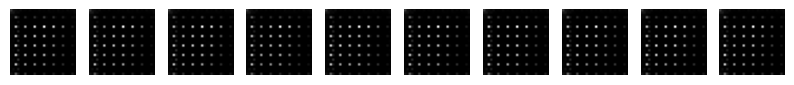

Time: 25.67 sec
Epoch 2/50


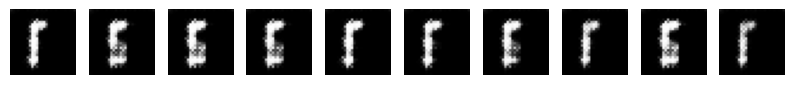

Time: 14.33 sec
Epoch 3/50


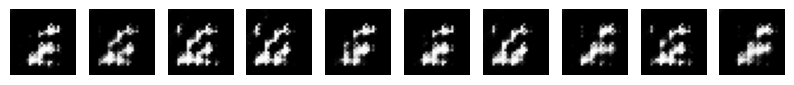

Time: 14.53 sec
Epoch 4/50


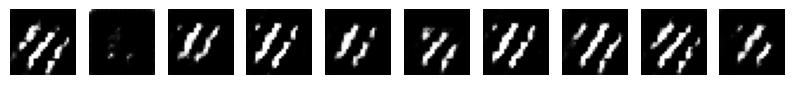

Time: 20.60 sec
Epoch 5/50


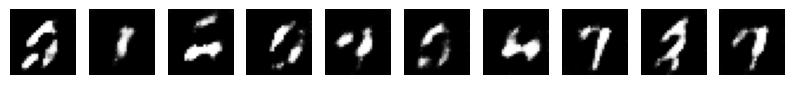

Time: 14.26 sec
Epoch 6/50


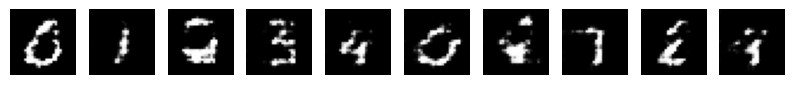

Time: 14.23 sec
Epoch 7/50


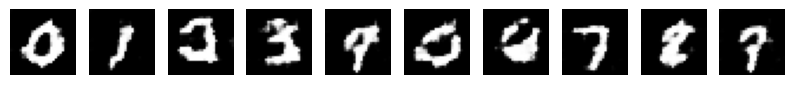

Time: 14.44 sec
Epoch 8/50


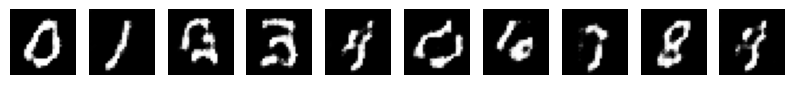

Time: 14.46 sec
Epoch 9/50


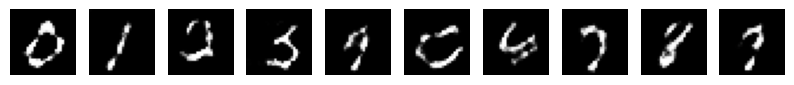

Time: 14.40 sec
Epoch 10/50


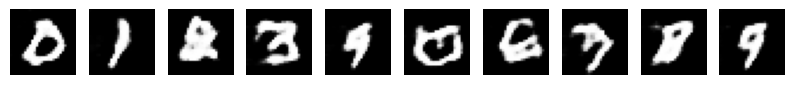

Time: 14.76 sec
Epoch 11/50


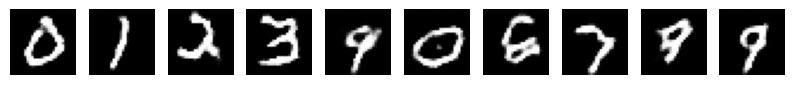

Time: 14.32 sec
Epoch 12/50


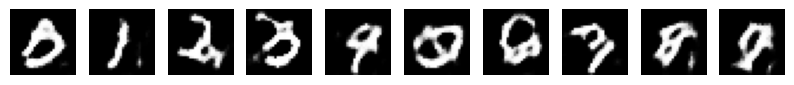

Time: 14.42 sec
Epoch 13/50


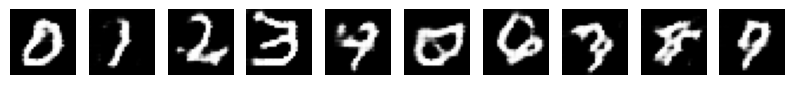

Time: 14.35 sec
Epoch 14/50


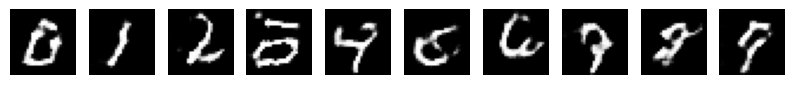

Time: 14.34 sec
Epoch 15/50


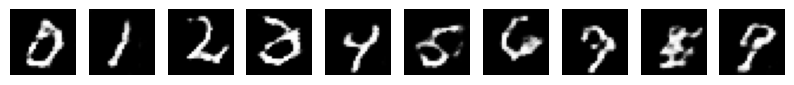

Time: 14.31 sec
Epoch 16/50


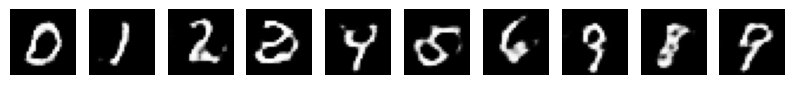

Time: 14.34 sec
Epoch 17/50


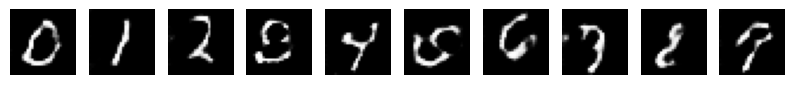

Time: 14.47 sec
Epoch 18/50


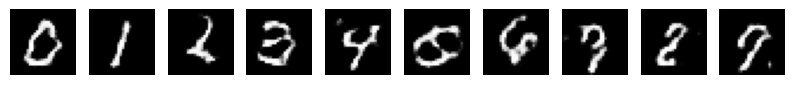

Time: 14.37 sec
Epoch 19/50


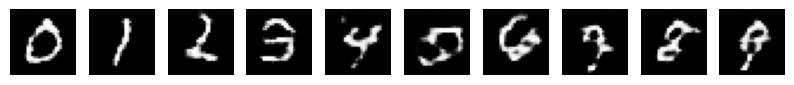

Time: 14.39 sec
Epoch 20/50


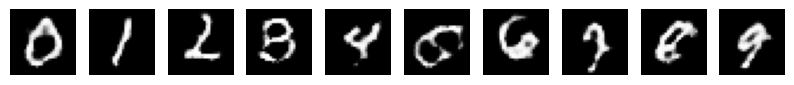

Time: 14.58 sec
Epoch 21/50


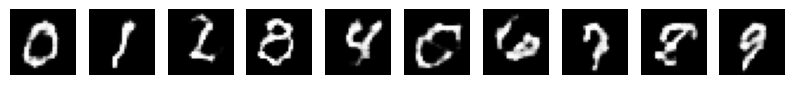

Time: 14.29 sec
Epoch 22/50


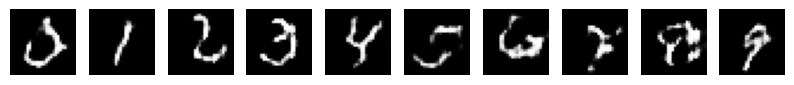

Time: 14.42 sec
Epoch 23/50


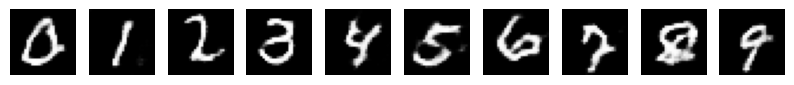

Time: 14.39 sec
Epoch 24/50


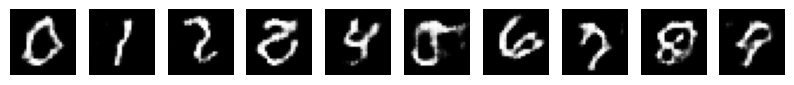

Time: 14.32 sec
Epoch 25/50


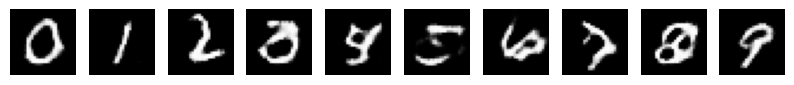

Time: 14.38 sec
Epoch 26/50


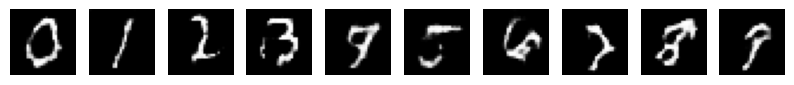

Time: 14.31 sec
Epoch 27/50


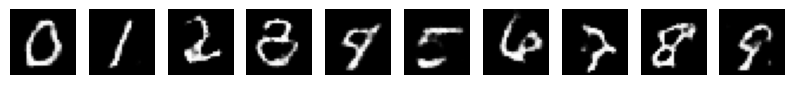

Time: 14.46 sec
Epoch 28/50


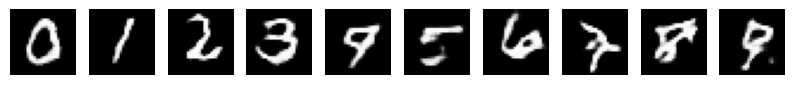

Time: 14.41 sec
Epoch 29/50


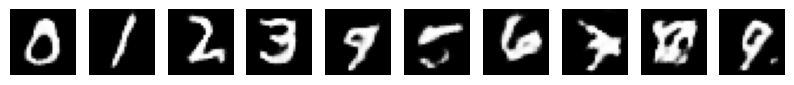

Time: 14.60 sec
Epoch 30/50


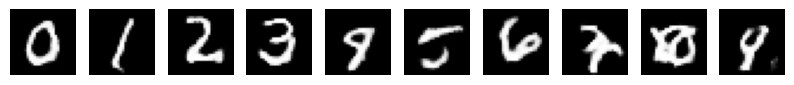

Time: 14.27 sec
Epoch 31/50


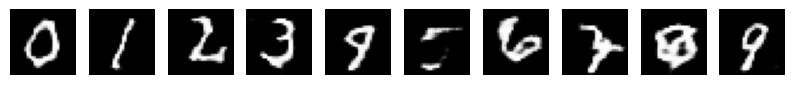

Time: 14.33 sec
Epoch 32/50


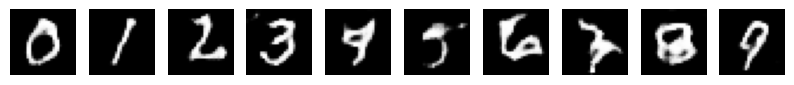

Time: 20.60 sec
Epoch 33/50


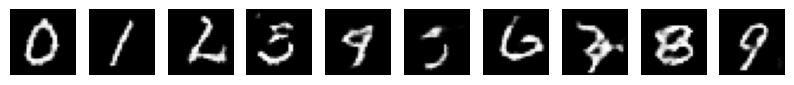

Time: 14.41 sec
Epoch 34/50


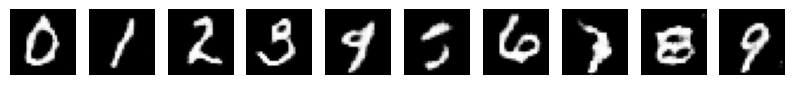

Time: 14.56 sec
Epoch 35/50


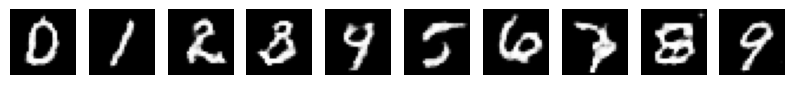

Time: 14.51 sec
Epoch 36/50


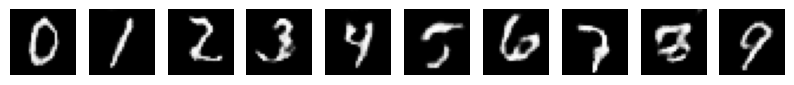

Time: 14.33 sec
Epoch 37/50


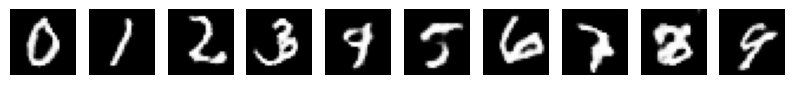

Time: 14.25 sec
Epoch 38/50


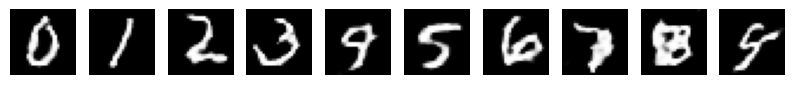

Time: 14.25 sec
Epoch 39/50


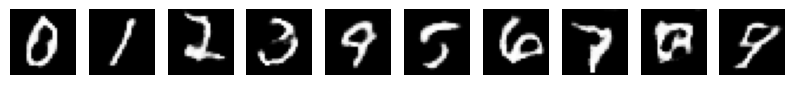

Time: 14.78 sec
Epoch 40/50


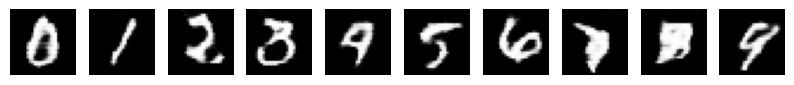

Time: 14.51 sec
Epoch 41/50


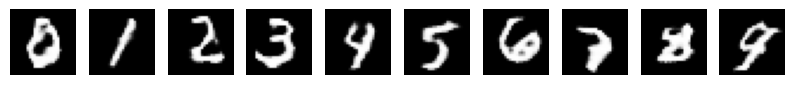

Time: 14.36 sec
Epoch 42/50


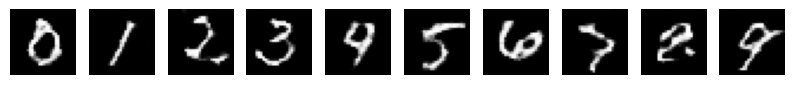

Time: 14.31 sec
Epoch 43/50


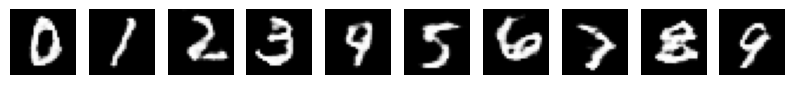

Time: 14.33 sec
Epoch 44/50


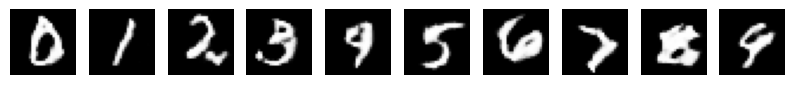

Time: 14.42 sec
Epoch 45/50


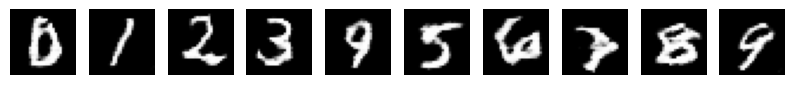

Time: 14.38 sec
Epoch 46/50


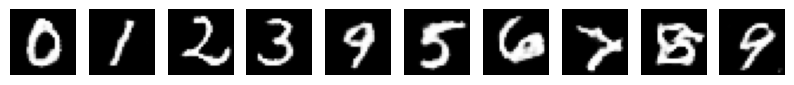

Time: 14.26 sec
Epoch 47/50


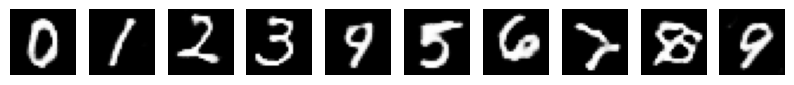

Time: 14.28 sec
Epoch 48/50


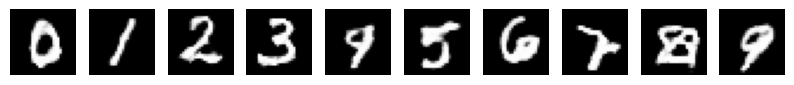

Time: 14.29 sec
Epoch 49/50


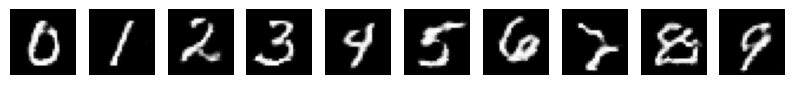

Time: 14.67 sec
Epoch 50/50


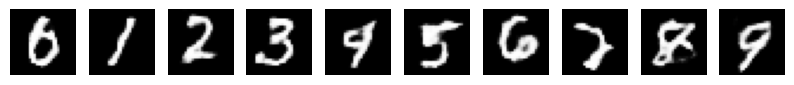

Time: 14.28 sec


In [ ]:
import time

EPOCHS = 50
seed = tf.random.normal([NUM_CLASSES, NOISE_DIM])
seed_labels = tf.constant([[i] for i in range(NUM_CLASSES)])

def generate_images(generator, epoch):
    predictions = generator([seed, seed_labels], training=False)
    fig = plt.figure(figsize=(10, 1))

    for i in range(predictions.shape[0]):
        plt.subplot(1, NUM_CLASSES, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

for epoch in range(EPOCHS):
    start = time.time()
    for image_batch, label_batch in dataset:
        train_step(image_batch, tf.expand_dims(label_batch, 1))

    print(f"Epoch {epoch+1}/{EPOCHS}")
    generate_images(generator, epoch)
    print(f"Time: {time.time()-start:.2f} sec")
